In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [8]:
# Basic Dataset Information
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [10]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

            TotalSpent  AvgTransactionValue  TransactionCount
CustomerID                                                   
C0141         10673.87          1067.387000                10
C0054          8040.39          1005.048750                 8
C0065          7663.70           766.370000                10
C0156          7634.45           694.040909                11
C0082          7572.91          1081.844286                 7
C0188          7111.32           888.915000                 8
C0059          7073.28           884.160000                 8
C0028          6819.57           852.446250                 8
C0099          6715.72           839.465000                 8
C0165          6708.10           745.344444                 9


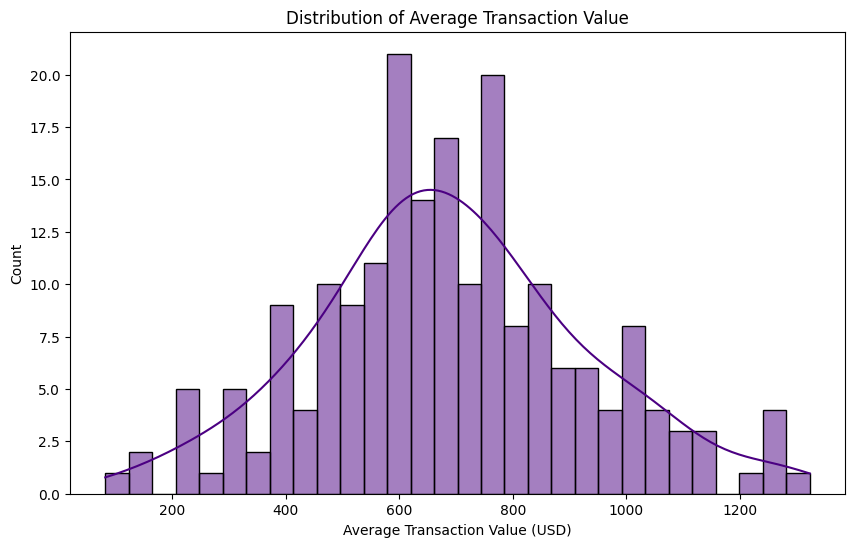

In [20]:
# Total and average spending per customer
customer_behavior = merged_data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    TransactionCount=('TransactionID', 'count')
).sort_values(by='TotalSpent', ascending=False)

print(customer_behavior.head(10))

# Plot average transaction value
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['AvgTransactionValue'], bins=30, kde=True, color='indigo')
plt.title("Distribution of Average Transaction Value")
plt.xlabel("Average Transaction Value (USD)")
plt.show()

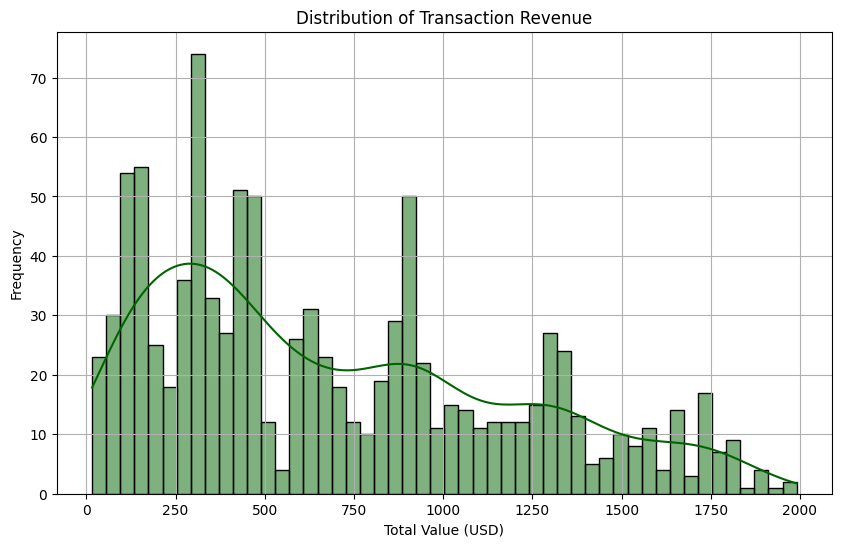

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], bins=50, kde=True, color='darkgreen')
plt.title("Distribution of Transaction Revenue")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

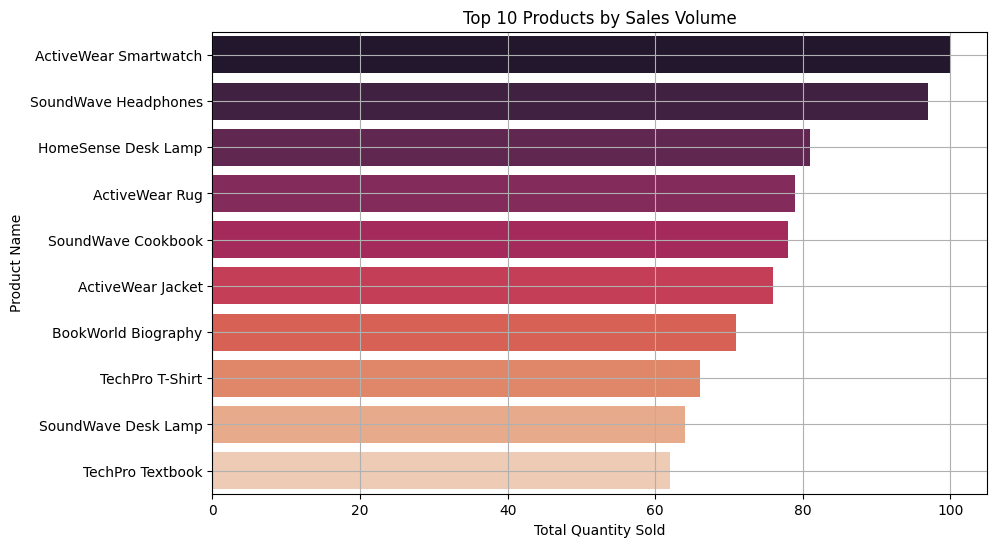

In [57]:
product_sales = (merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, hue=product_sales.index, palette="rocket", dodge=False, legend=False)
plt.title("Top 10 Products by Sales Volume")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.grid()
plt.show()


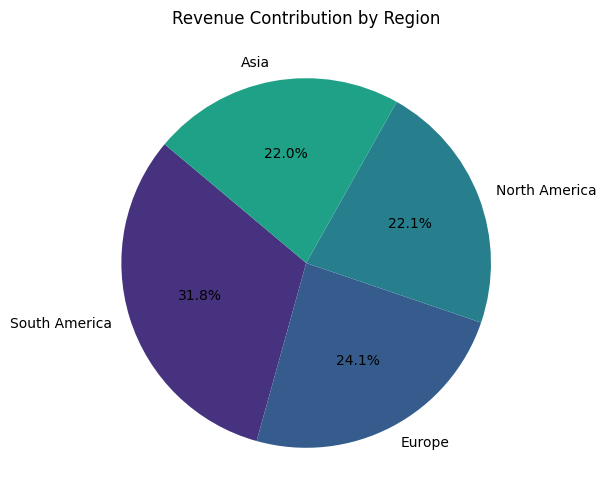

In [30]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Revenue Contribution by Region")
plt.ylabel("")
plt.show()

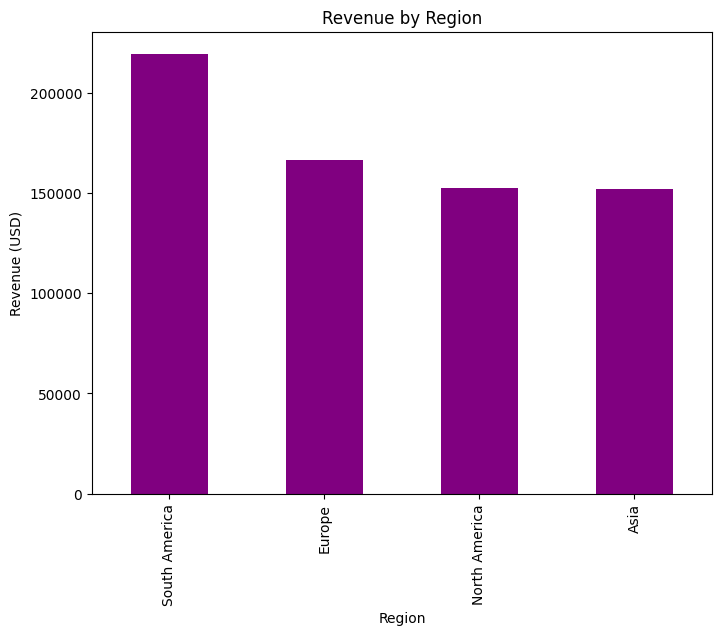

In [51]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

#Revenue by region
region_revenue.plot(kind='bar', figsize=(8, 6), color='purple')
plt.title("Revenue by Region")
plt.ylabel("Revenue (USD)")
plt.show()

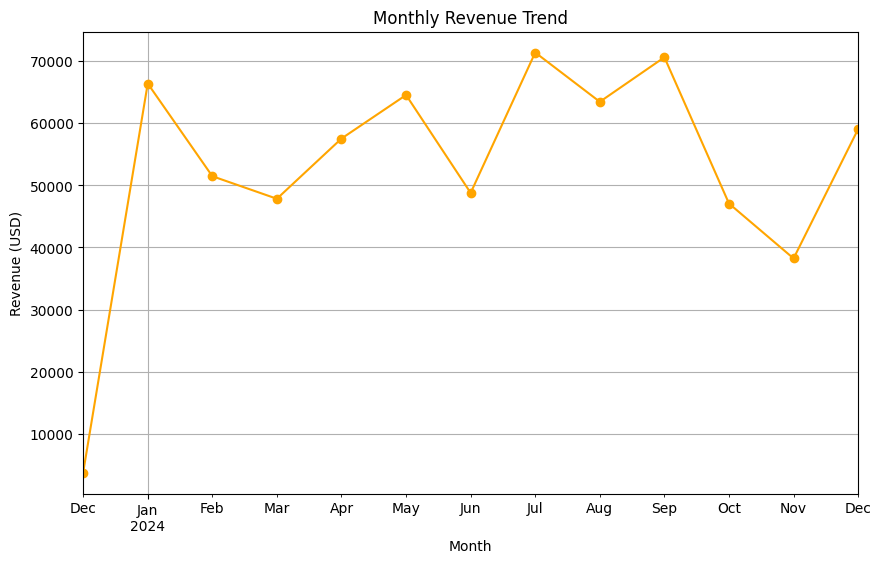

In [55]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.grid()
plt.show()

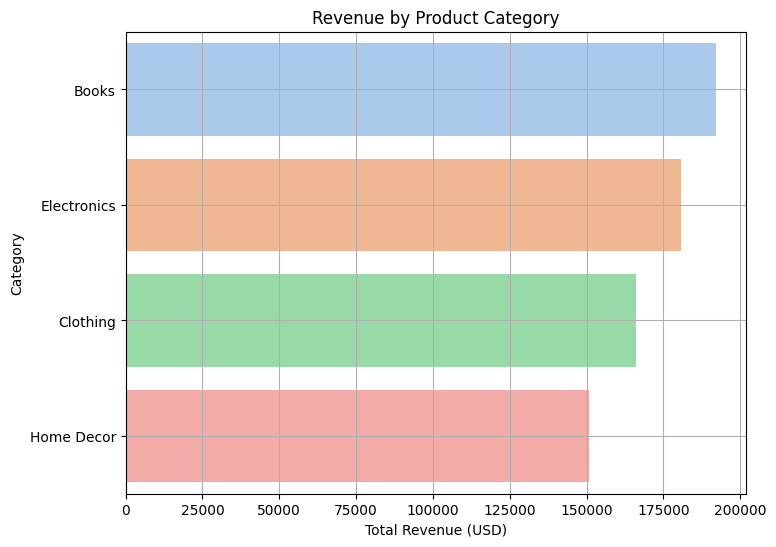

In [47]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=category_revenue.values,
    y=category_revenue.index,
    hue=category_revenue.index,
    palette=sns.color_palette("pastel", n_colors=len(category_revenue)),
    dodge=False
)
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.grid()
plt.show()


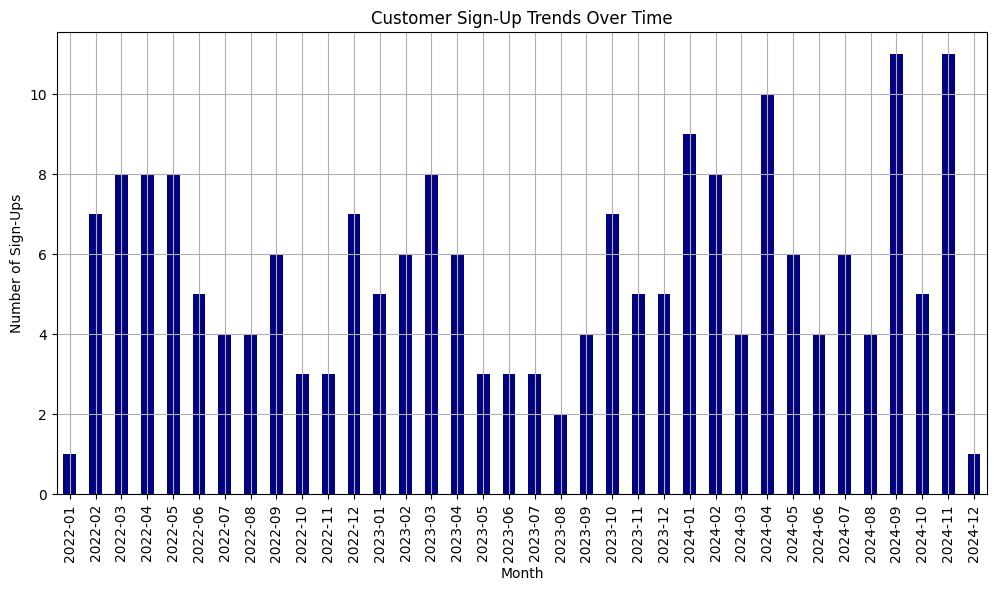

In [50]:
signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
signup_trend.plot(kind='bar', color='navy')
plt.title("Customer Sign-Up Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Sign-Ups")
plt.grid()
plt.show()

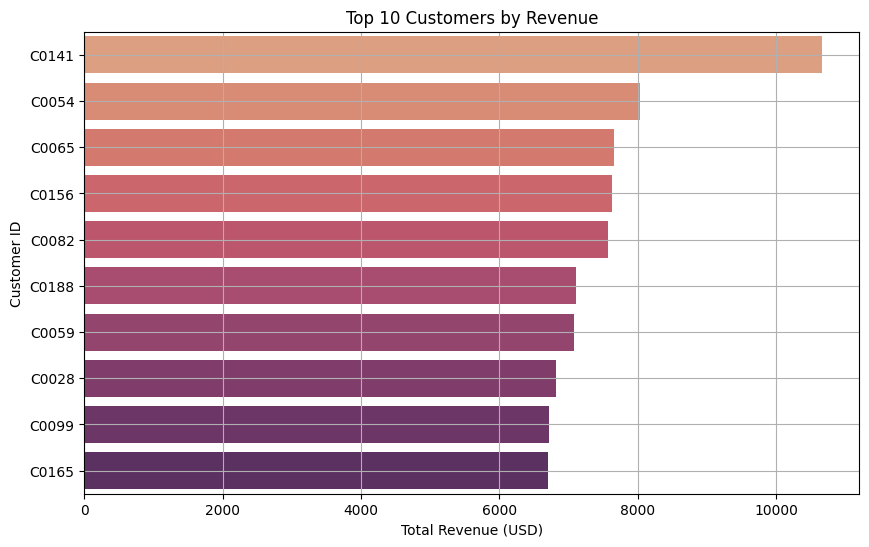

In [58]:
top_customers = (merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_customers.values,
    y=top_customers.index,
    hue=top_customers.index,
    palette="flare",
    dodge=False,
)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.grid()
plt.show()
